In [18]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression



In [2]:
quandl.ApiConfig.api_key = 'WErs71E4DjxcF1q7wmE1'

df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]
df.head()


,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833


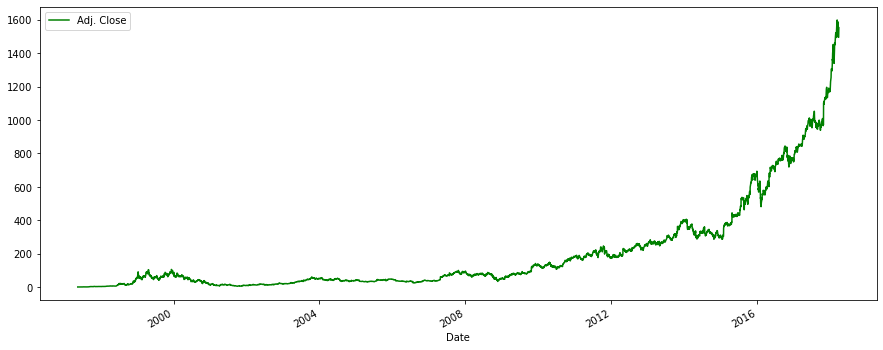

In [3]:
df['Adj. Close'].plot(figsize=(15,6), color ='g')
plt.legend(loc='upper left')
plt.show()

In [14]:
forecast = 30
df['Prediction']= df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1502.618829   1541.53314458 1552.93906466 1539.01979524 1559.95727319
 1575.47401041 1577.43357091 1593.66384374 1617.04012253 1606.42228656
 1606.92282647 1586.68823435 1593.93008838 1618.8079869  1633.74963571
 1641.58787771 1648.89363044 1677.68000017 1698.44708156 1687.57365074
 1690.5768902  1681.33287654 1670.00150495 1641.51332921 1685.79513659
 1680.84298641 1640.62939703 1588.93533906 1653.15354457 1590.52215707]


(17282.0, 18029.5)

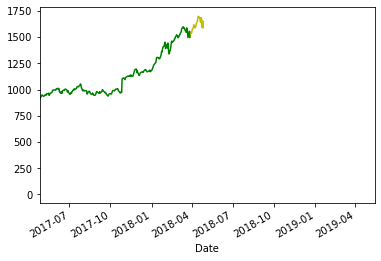

In [21]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates,forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))